In [205]:
#import the required modules
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import tree

In [18]:

features = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 
            'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 
            'improvement_surcharge', 'total_amount', 'trip_type', 'congestion_surcharge', 'tip']

file_path = '/Users/mattrusso/Desktop/trip_data.csv' #TODO: provide the file path or URL to the dataset `trip_data.csv`
df = pd.read_csv(file_path, usecols=features)

#after the data is loaded in the dataframe, you would normally perform preliminary analysis to verify the data.
# For example, using df.head() and df.describe() but you can skip that step for now. 

#assign the input features to a variable called 'X' and the labels in a variable called 'y'
X = df.iloc[:,0:14].to_numpy() #input features
y = df.iloc[:,14].tolist() #labels

In [251]:
df

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,trip_type,congestion_surcharge,tip
0,2.0,1.0,24,41,1.0,0.67,5.5,0.5,0.5,0.0,0.3,8.84,1.0,0.00,good
1,2.0,1.0,112,232,1.0,2.64,10.0,0.5,0.5,0.0,0.3,16.86,1.0,2.75,low
2,2.0,1.0,97,227,5.0,3.85,18.0,0.5,0.5,0.0,0.3,22.20,1.0,0.00,low
3,2.0,1.0,223,129,1.0,2.97,11.5,0.5,0.5,0.0,0.3,13.80,1.0,0.00,low
4,2.0,1.0,223,7,1.0,1.60,8.0,0.5,0.5,0.0,0.3,11.62,1.0,0.00,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171936,2.0,1.0,116,42,1.0,0.61,5.0,0.5,0.5,0.0,0.3,6.30,1.0,0.00,no-tip
171937,2.0,1.0,74,75,1.0,0.93,4.5,0.5,0.5,0.0,0.3,10.80,1.0,0.00,good
171938,2.0,1.0,255,95,1.0,6.45,22.0,0.5,0.5,0.0,0.3,28.75,1.0,0.00,low
171939,2.0,1.0,61,80,1.0,3.77,15.5,0.5,0.5,0.0,0.3,21.84,1.0,0.00,good


In [49]:
seed = 5  # provide an integer for the random number generator.

#Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = .30, #TODO: provide the test_size (refer to the instructions for the assignment)
                                                    random_state = 42, #seed the random generator for reproducibilty
                                                    stratify = y
                                                   )

#Note: X_train and y_train are the input features and labels for the training set respectively.
#Note: X_test and y_test are the input features and labels for the test set respectively.

In [68]:
#Instantiate the Decision Tree Classifier object 
dt_classifier = DecisionTreeClassifier(criterion= 'gini', 
                                       max_depth= 25 #set the value (refer to the instructions above)
                                      )

In [105]:
dtc = dt_classifier.fit(X_train,y_train)

In [106]:
y_pred = dt_classifier.predict(X_test)

In [107]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9717930325882558


In [ ]:
# 97.17% accuracy - increasing max_depth improved results significantly

In [101]:
import matplotlib.pyplot as plt

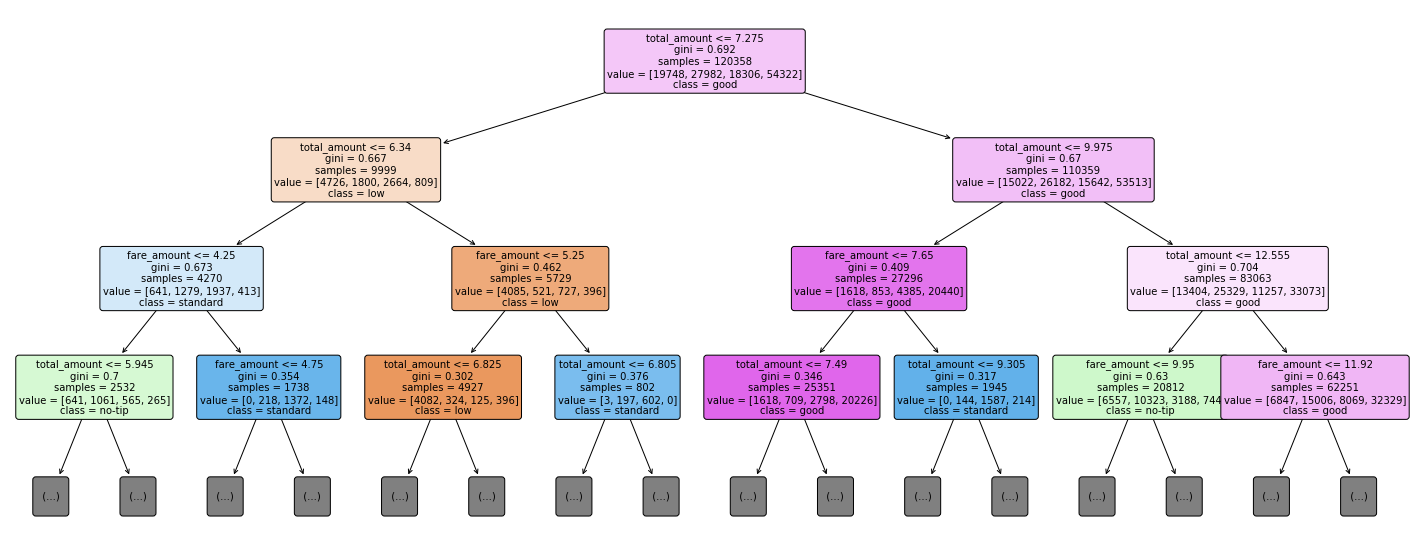

In [248]:
fig, ax = plt.subplots(figsize=(25, 10))  
tree.plot_tree(dtc, feature_names = features [:-1], class_names = list(set(y)), precision = 3, proportion = False, rounded = True,
               max_depth= 3, fontsize= 10, filled = True);

In [ ]:
# The decision tree above provides a nice visual where we can take learn about our data. 
# Above only represents portions of the decision tree but you can take a look at the important features
# Looking at features such as total_amount, fare_amount and how it relates to our class_names is easy to identify 
# The gini index and the balance/imbalance of impurity sheds light on the importance of a given feature and individual nodes
